# Tamaños Corregidos

## Orden de Ejecución nuevos tamaños

In [ ]:
# Lista de ejecutables
import random
versions = [
".\ProductMatrix_X64_d_verA.exe",
".\ProductMatrix_X64_d_verB.exe",
".\ProductMatrix_X64_d_verC.exe",
".\ProductMatrix_X64_d_verD.exe",
".\ProductMatrix_X64_d_verE.exe",
".\ProductMatrix_X64_d_verF.exe",
".\ProductMatrix_X64_f_verA.exe",
".\ProductMatrix_X64_f_verB.exe",
".\ProductMatrix_X64_f_verC.exe",
".\ProductMatrix_X64_f_verD.exe",
".\ProductMatrix_X64_f_verE.exe",
".\ProductMatrix_X64_f_verF.exe",
".\ProductMatrix_X86_d_verA.exe",
".\ProductMatrix_X86_d_verB.exe",
".\ProductMatrix_X86_d_verC.exe",
".\ProductMatrix_X86_d_verD.exe",
".\ProductMatrix_X86_d_verE.exe",
".\ProductMatrix_X86_d_verF.exe",
".\ProductMatrix_X86_f_verA.exe",
".\ProductMatrix_X86_f_verB.exe",
".\ProductMatrix_X86_f_verC.exe",
".\ProductMatrix_X86_f_verD.exe",
".\ProductMatrix_X86_f_verE.exe",
".\ProductMatrix_X86_f_verF.exe"
]

# Lista de tamaños de matriz
matrix_sizes = [170, 440, 565, 670, 780, 915, 1185, 1470, 1700, 2050]
samples =      [19,  15,  15,   15,  10,  15,    18,  9,    7,   5]


# Generar combinaciones
combinations = [
    (version, size, sample)
    for version in versions
    for size, sample in zip(matrix_sizes, samples)
]
# Aleatorizar la lista de combinaciones
random.shuffle(combinations)

# Mostrar combinaciones aleatorizadas
for combination in combinations:
    print(combination[0], combination[1],  combination[2])


.\ProductMatrix_X86_d_verB.exe 1185 18
.\ProductMatrix_X86_d_verF.exe 670 15
.\ProductMatrix_X86_f_verE.exe 2050 5
.\ProductMatrix_X64_d_verA.exe 1470 9
.\ProductMatrix_X64_f_verF.exe 780 10
.\ProductMatrix_X86_d_verD.exe 565 15
.\ProductMatrix_X64_d_verE.exe 565 15
.\ProductMatrix_X86_d_verB.exe 780 10
.\ProductMatrix_X64_d_verE.exe 440 15
.\ProductMatrix_X64_d_verB.exe 1185 18
.\ProductMatrix_X64_d_verA.exe 2050 5
.\ProductMatrix_X86_f_verF.exe 1185 18
.\ProductMatrix_X64_d_verF.exe 915 15
.\ProductMatrix_X86_f_verD.exe 565 15
.\ProductMatrix_X86_f_verB.exe 440 15
.\ProductMatrix_X64_d_verF.exe 1185 18
.\ProductMatrix_X86_f_verC.exe 565 15
.\ProductMatrix_X64_d_verB.exe 670 15
.\ProductMatrix_X86_f_verA.exe 1185 18
.\ProductMatrix_X86_f_verB.exe 1470 9
.\ProductMatrix_X86_f_verE.exe 915 15
.\ProductMatrix_X86_f_verA.exe 565 15
.\ProductMatrix_X64_f_verA.exe 440 15
.\ProductMatrix_X86_d_verD.exe 1470 9
.\ProductMatrix_X86_d_verE.exe 440 15
.\ProductMatrix_X64_f_verD.exe 780 10
.\Produ

In [ ]:
# Importar librerías necesarias
!pip install researchpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import numpy as np

# Cargar y preparar los conjuntos de datos desde las dos hojas
df_pc = pd.read_excel("Datos_Ajustados_Optimizado.xlsx", sheet_name="ReportePCIteracionesAjustadas")
df_laptop = pd.read_excel("Datos_Ajustados_Optimizado.xlsx", sheet_name="ReporteLaptopIteracionesAjustad")

# Renombrar columnas para facilitar el acceso y transformar columnas en categorías
for df in [df_pc, df_laptop]:
    df.rename(columns={"ver": "version", "typeData": "type", "ISA": "ISA_type"}, inplace=True)
    df['version'] = pd.Categorical(df['version'].str.strip())  # Eliminar espacios y convertir en categoría
    df['type'] = pd.Categorical(df['type'].str.strip())  # Convertir 'type' en categoría
    df['size'] = pd.Categorical(df['n'])  # Convertir 'n' (tamaño de matriz) en categoría
    df['ISA_type'] = pd.Categorical(df['ISA_type'].str.strip())  # Convertir 'ISA_type' en categoría

In [ ]:
# Función para realizar ANOVA de cuatro factores y visualizar resultados
def realizar_anova_y_graficas(df, nombre_pc):
    print(f"\n=========== ANÁLISIS PARA {nombre_pc} =============\n")

    # Estadísticas descriptivas
    print("================= Summary 'Normalized_ns' por 'version' =============")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['version'], observed=False)))
    print("================= Summary 'Normalized_ns' por 'type' ================")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['type'], observed=False)))
    print("================= Summary 'Normalized_ns' por 'size' ================")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['size'], observed=False)))
    print("================= Summary 'Normalized_ns' por 'ISA_type' ============")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['ISA_type'], observed=False)))

    # Modelo ANOVA de cuatro factores
    modelo = ols('Q("Normalized(ns)") ~ C(version) + C(size) + C(type) + C(ISA_type) + '
                 'C(version)*C(size) + C(version)*C(type) + C(version)*C(ISA_type) + '
                 'C(size)*C(type) + C(size)*C(ISA_type) + C(type)*C(ISA_type) + '
                 'C(version)*C(size)*C(type)*C(ISA_type)',
                 data=df).fit()

    # Tabla ANOVA
    print("=========== TABLA ANOVA Cuatro Vías ================")
    tabla_anova = anova_lm(modelo, typ=2)
    print(tabla_anova)

    # Gráfico de interacción de cuatro factores
    sns.catplot(
        x='size',
        y='Normalized(ns)',
        hue='version',
        col='type',        # Dividir por el factor de tipo de dato (float/double)
        row='ISA_type',    # Dividir también por el ISA
        kind='point',
        data=df,
        errorbar=None,
        height=5,
        aspect=1.5
    )

    # Título del gráfico
    plt.suptitle(f'Gráfico de Interacción de Cuatro Factores para {nombre_pc}', y=1.05)
    plt.show()


=========== ANÁLISIS PARA PC de Escritorio =============

================= Summary 'Normalized_ns' por 'version' =============


           N    Mean      SD      SE  95% Conf.  Interval
version                                                  
ver(a)   512  2.3931  0.2743  0.0121     2.3693    2.4169
ver(b)   512  3.0343  1.2111  0.0535     2.9292    3.1395
ver(c)   512  2.5811  0.0912  0.0040     2.5732    2.5890
ver(d)   512  2.4642  0.0715  0.0032     2.4580    2.4704
ver(e)   512  4.9704  2.8136  0.1243     4.7261    5.2147
ver(f)   512  5.2189  3.2377  0.1431     4.9377    5.5000
================= Summary 'Normalized_ns' por 'type' ================


         N    Mean      SD      SE  95% Conf.  Interval
type                                                   
d     1536  3.7262  2.4850  0.0634     3.6019    3.8506
f     1536  3.1611  1.7688  0.0451     3.0726    3.2496
================= Summary 'Normalized_ns' por 'size' ================


        N    Mean      SD      SE  95

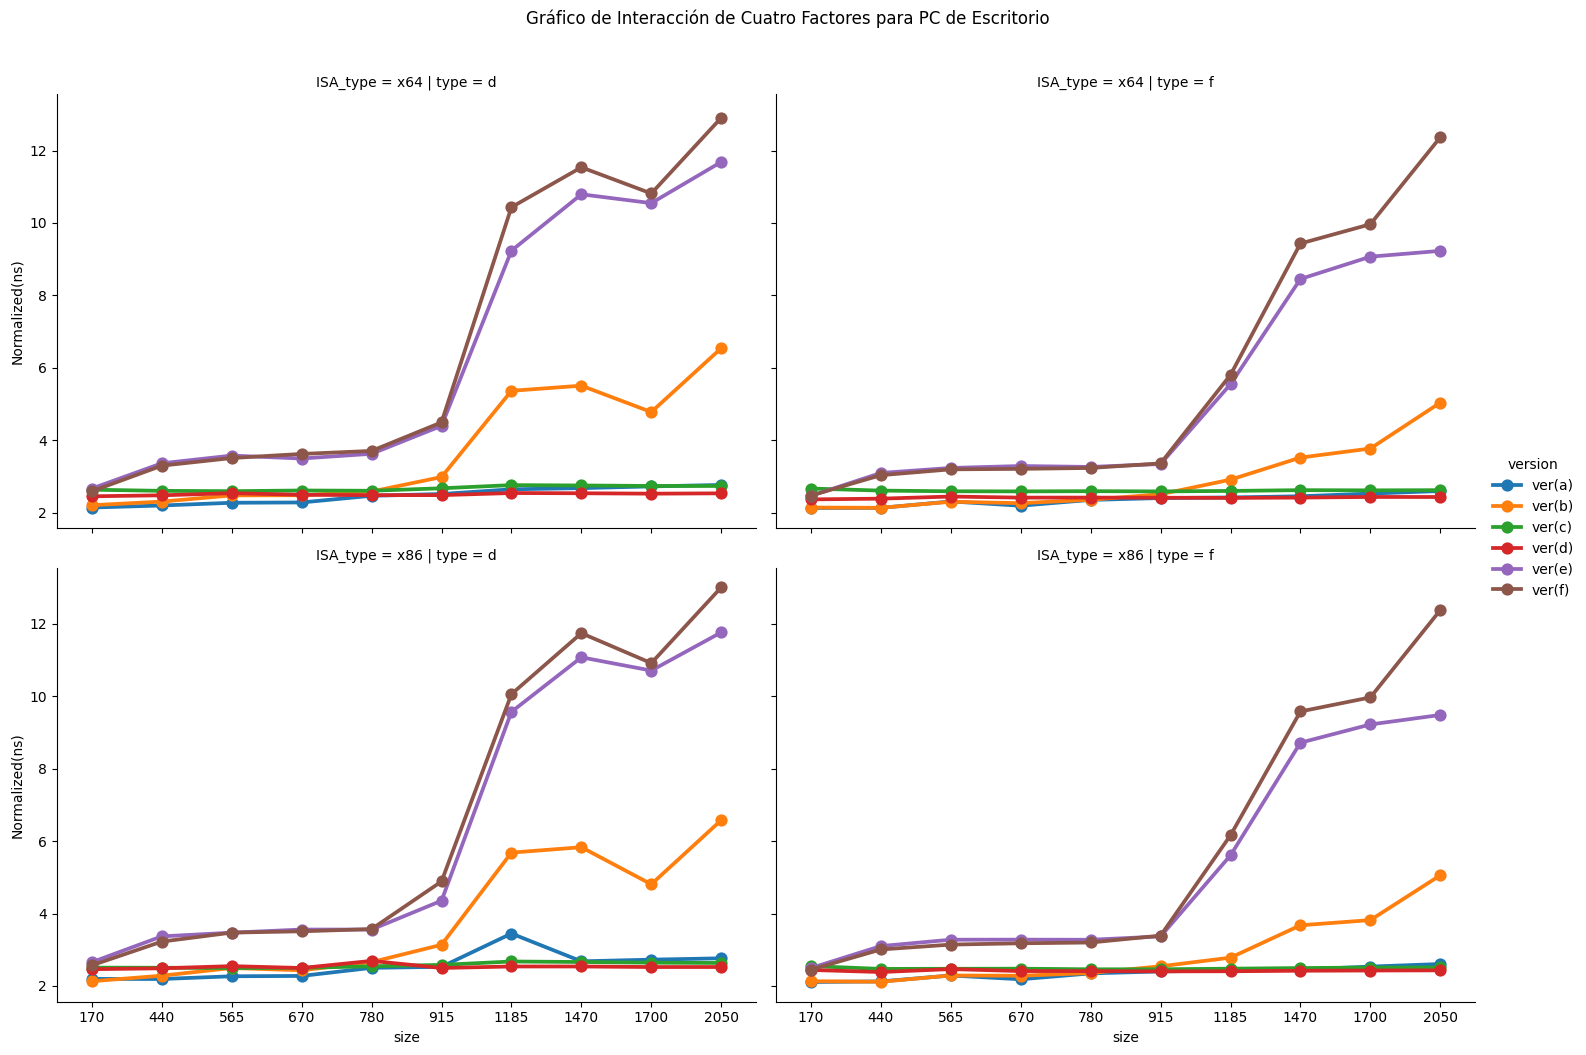


=========== ANÁLISIS PARA Laptop =============

================= Summary 'Normalized_ns' por 'version' =============


           N    Mean      SD      SE  95% Conf.  Interval
version                                                  
ver(a)   512  1.7153  0.0499  0.0022     1.7110    1.7196
ver(b)   512  1.8603  0.3688  0.0163     1.8283    1.8924
ver(c)   512  1.6547  0.0543  0.0024     1.6500    1.6595
ver(d)   512  1.6957  0.0457  0.0020     1.6917    1.6997
ver(e)   512  2.8592  1.3179  0.0582     2.7448    2.9737
ver(f)   512  2.7657  1.3475  0.0596     2.6487    2.8827
================= Summary 'Normalized_ns' por 'type' ================


         N    Mean      SD      SE  95% Conf.  Interval
type                                                   
d     1536  2.1941  1.0439  0.0266     2.1419    2.2463
f     1536  1.9896  0.8055  0.0206     1.9493    2.0299
================= Summary 'Normalized_ns' por 'size' ================


        N    Mean      SD      SE  95% Conf.  I

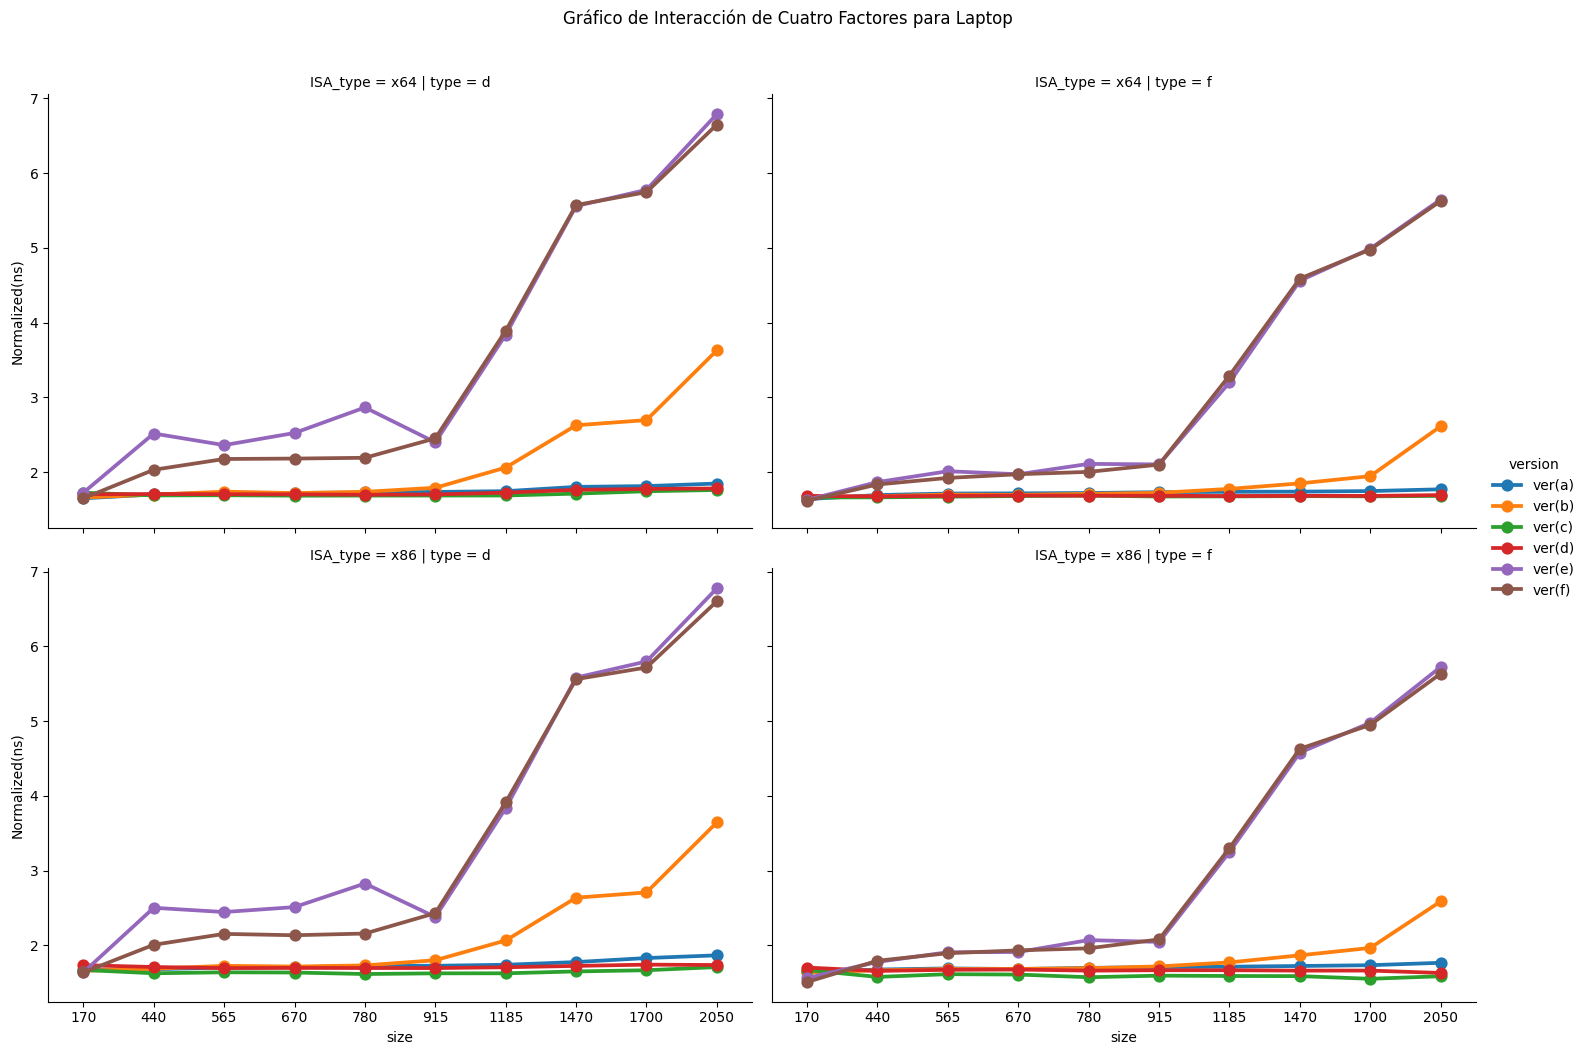

In [ ]:
# Ejecutar ANOVA y gráficos para cada computadora
realizar_anova_y_graficas(df_pc, "PC de Escritorio")
realizar_anova_y_graficas(df_laptop, "Laptop")

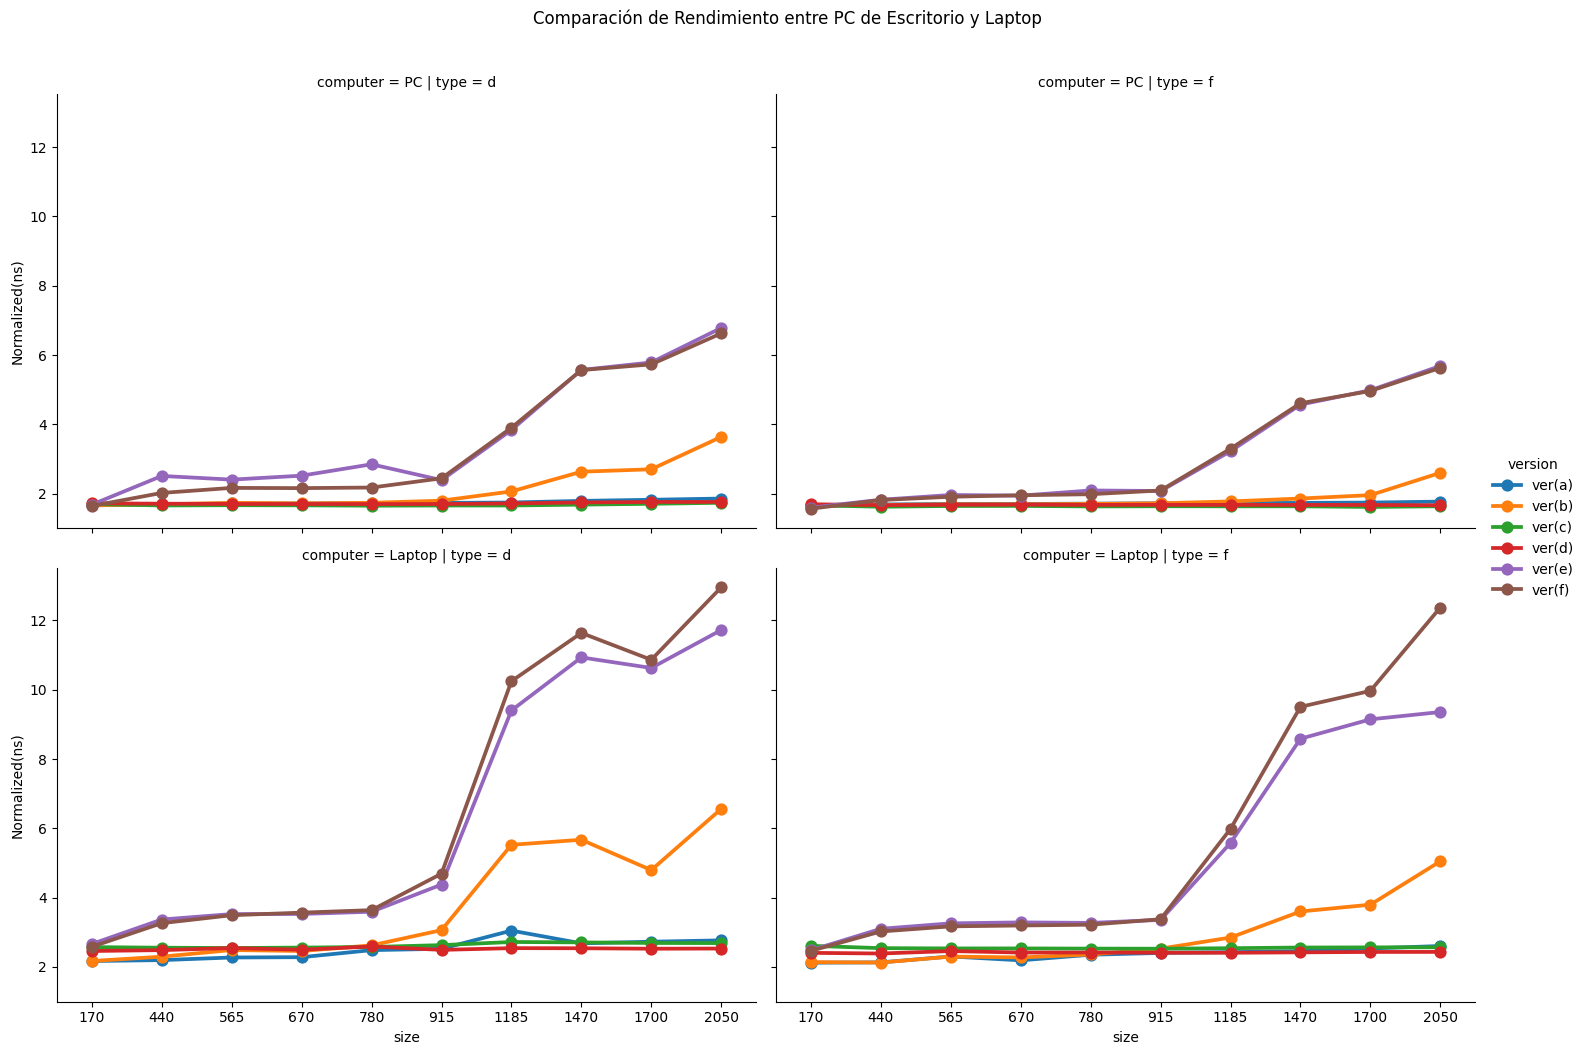

In [ ]:
# Comparación gráfica entre PC de Escritorio y Laptop para un análisis conjunto de rendimiento
df_pc['computer'] = 'PC'
df_laptop['computer'] = 'Laptop'
df_combined = pd.concat([df_pc, df_laptop])

# Gráfico comparativo de interacción entre los dos equipos
sns.catplot(
    x='size',
    y='Normalized(ns)',
    hue='version',
    col='type',        # Dividir por el factor de tipo de dato (float/double)
    row='computer',    # Comparar entre PC y Laptop
    kind='point',
    data=df_combined,
    errorbar=None,
    height=5,
    aspect=1.5
)

# Título del gráfico comparativo
plt.suptitle('Comparación de Rendimiento entre PC de Escritorio y Laptop', y=1.05)
plt.show()


# Versión Optimizada / ANOVA de Tres Vías


In [ ]:
# Lista de ejecutables para PC
import random
versions = [
".\ProductMatrix_X64_d_verProductMatByBlocks.exe",
".\ProductMatrix_X64_f_verProductMatByBlocks.exe",
".\ProductMatrix_X86_d_verProductMatByBlocks.exe",
".\ProductMatrix_X86_f_verProductMatByBlocks.exe",
]

# Lista de tamaños de matriz
matrix_sizes = [170, 440, 565, 670, 780, 915, 1185, 1470, 1700, 2050] # indique los niveles asignados por el profesor
samples =      [15,  15,  15,   15,  10,  10,    7,  5,    3,   3]


# Generar combinaciones
combinations = [
    (version, size, sample)
    for version in versions
    for size, sample in zip(matrix_sizes, samples)
]
# Aleatorizar la lista de combinaciones
random.shuffle(combinations)

# Mostrar combinaciones aleatorizadas
for combination in combinations:
    print(combination[0], combination[1],  combination[2], 49152) # Tamaño de la cache: 48KB


.\ProductMatrix_X64_f_verProductMatByBlocks.exe 915 10 49152
.\ProductMatrix_X64_d_verProductMatByBlocks.exe 440 15 49152
.\ProductMatrix_X64_d_verProductMatByBlocks.exe 170 15 49152
.\ProductMatrix_X64_d_verProductMatByBlocks.exe 915 10 49152
.\ProductMatrix_X86_f_verProductMatByBlocks.exe 440 15 49152
.\ProductMatrix_X86_f_verProductMatByBlocks.exe 1700 3 49152
.\ProductMatrix_X64_f_verProductMatByBlocks.exe 1470 5 49152
.\ProductMatrix_X64_d_verProductMatByBlocks.exe 1700 3 49152
.\ProductMatrix_X86_f_verProductMatByBlocks.exe 915 10 49152
.\ProductMatrix_X86_f_verProductMatByBlocks.exe 565 15 49152
.\ProductMatrix_X64_f_verProductMatByBlocks.exe 1700 3 49152
.\ProductMatrix_X86_d_verProductMatByBlocks.exe 1700 3 49152
.\ProductMatrix_X64_f_verProductMatByBlocks.exe 2050 3 49152
.\ProductMatrix_X86_f_verProductMatByBlocks.exe 2050 3 49152
.\ProductMatrix_X86_d_verProductMatByBlocks.exe 1185 7 49152
.\ProductMatrix_X86_d_verProductMatByBlocks.exe 170 15 49152
.\ProductMatrix_X64_d_ve

In [ ]:
# Importar librerías necesarias
!pip install researchpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import numpy as np

# Cargar y preparar los conjuntos de datos desde las dos hojas
df_pc = pd.read_excel("Datos_Ajustados_Optimizado.xlsx", sheet_name="ReportOptimizedPC")
df_laptop = pd.read_excel("Datos_Ajustados_Optimizado.xlsx", sheet_name="ReportOptimizedLaptop")

# Renombrar columnas para facilitar el acceso y transformar columnas en categorías
for df in [df_pc, df_laptop]:
    df.rename(columns={"ver": "version", "typeData": "type", "ISA": "ISA_type"}, inplace=True)
    df['version'] = pd.Categorical(df['version'].str.strip())  # Eliminar espacios y convertir en categoría
    df['type'] = pd.Categorical(df['type'].str.strip())  # Convertir 'type' en categoría
    df['size'] = pd.Categorical(df['n'])  # Convertir 'n' (tamaño de matriz) en categoría
    df['ISA_type'] = pd.Categorical(df['ISA_type'].str.strip())  # Convertir 'ISA_type' en categoría

In [ ]:
# Función para realizar ANOVA de tres factores y visualizar resultados
def realizar_anova_y_graficas(df, nombre_pc):
    print(f"\n=========== ANÁLISIS PARA {nombre_pc} =============\n")

    # Estadísticas descriptivas
    print("================= Summary 'Normalized_ns' por 'type' ================")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['type'], observed=False)))
    print("================= Summary 'Normalized_ns' por 'size' ================")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['size'], observed=False)))
    print("================= Summary 'Normalized_ns' por 'ISA_type' ============")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['ISA_type'], observed=False)))

    # Modelo ANOVA de tres factores
    modelo = ols('Q("Normalized(ns)") ~ C(size) + C(type) + C(ISA_type) + '
                 'C(size)*C(type) + C(size)*C(ISA_type) + C(type)*C(ISA_type) + '
                 'C(size)*C(type)*C(ISA_type)',
                 data=df).fit()

    # Tabla ANOVA
    print("=========== TABLA ANOVA Tres Vías ================")
    tabla_anova = anova_lm(modelo, typ=2)
    print(tabla_anova)

    # Gráfico de interacción de tres factores
    sns.catplot(
        x='size',
        y='Normalized(ns)',
        hue='type',
        col='ISA_type',    # Dividir por el ISA
        kind='point',
        data=df,
        errorbar=None,
        height=5,
        aspect=1.5
    )

    # Título del gráfico
    plt.suptitle(f'Gráfico de Interacción de Tres Factores para {nombre_pc}', y=1.05)
    plt.show()



=========== ANÁLISIS PARA PC de Escritorio =============

================= Summary 'Normalized_ns' por 'type' ================


        N    Mean      SD      SE  95% Conf.  Interval
type                                                  
d     196  1.9047  0.0494  0.0035     1.8977    1.9116
f     196  1.8992  0.0438  0.0031     1.8931    1.9054
================= Summary 'Normalized_ns' por 'size' ================


       N    Mean      SD      SE  95% Conf.  Interval
size                                                 
170   60  1.9303  0.1026  0.0132     1.9038    1.9568
440   60  1.8943  0.0214  0.0028     1.8888    1.8998
565   60  1.8979  0.0228  0.0029     1.8920    1.9037
670   60  1.8917  0.0169  0.0022     1.8874    1.8961
780   40  1.8912  0.0162  0.0026     1.8860    1.8964
915   40  1.8938  0.0083  0.0013     1.8911    1.8965
1185  28  1.8934  0.0230  0.0043     1.8844    1.9023
1470  20  1.9135  0.0331  0.0074     1.8980    1.9290
1700  12  1.9132  0.0336  0.0097     

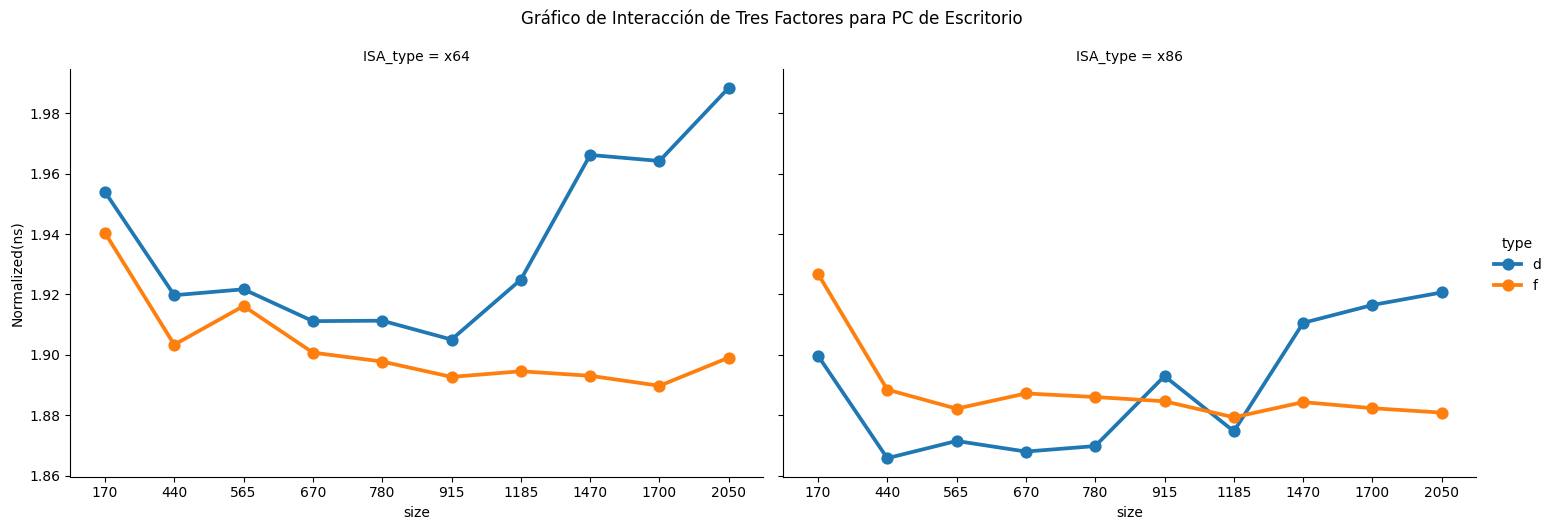


=========== ANÁLISIS PARA Laptop =============

================= Summary 'Normalized_ns' por 'type' ================


        N    Mean      SD      SE  95% Conf.  Interval
type                                                  
d     196  2.7648  0.0639  0.0046     2.7558    2.7738
f     196  2.7303  0.0496  0.0035     2.7233    2.7373
================= Summary 'Normalized_ns' por 'size' ================


       N    Mean      SD      SE  95% Conf.  Interval
size                                                 
170   60  2.7851  0.1214  0.0157     2.7538    2.8165
440   60  2.7276  0.0178  0.0023     2.7230    2.7322
565   60  2.7301  0.0169  0.0022     2.7257    2.7344
670   60  2.7206  0.0104  0.0013     2.7179    2.7233
780   40  2.7284  0.0149  0.0023     2.7237    2.7332
915   40  2.7546  0.0408  0.0064     2.7415    2.7676
1185  28  2.7839  0.0676  0.0128     2.7577    2.8102
1470  20  2.7792  0.0350  0.0078     2.7628    2.7956
1700  12  2.7689  0.0209  0.0060     2.7556    

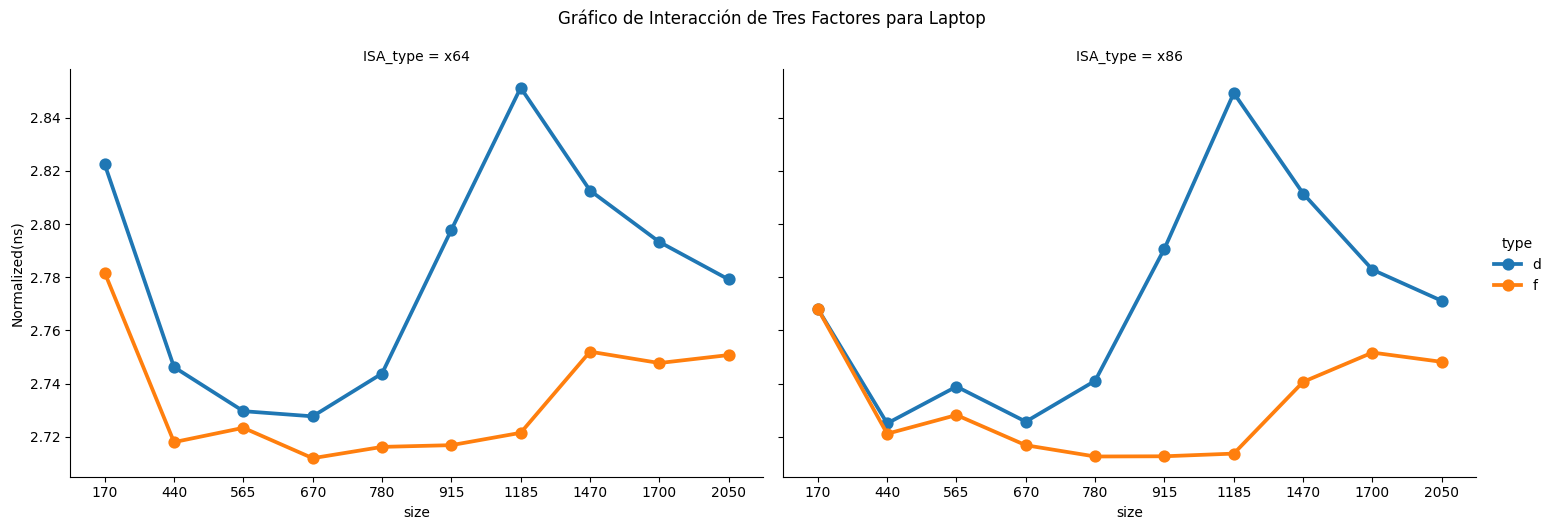

In [ ]:
# Ejecutar ANOVA y gráficos para cada computadora
realizar_anova_y_graficas(df_pc, "PC de Escritorio")
realizar_anova_y_graficas(df_laptop, "Laptop")

In [ ]:
def detectar_outliers_desviacion_estandar(data, umbral=3):
    media = np.mean(data)
    desviacion_estandar = np.std(data)
    outliers = [x for x in data if abs(x - media) > umbral * desviacion_estandar]
    return outliers

print("================= Análisis de valores atípicos para PC=========================")

data_ver_a=df_pc[df_pc['version'].isin(['ver(a)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(a):", outliers)


data_ver_a=df_pc[df_pc['version'].isin(['ver(b)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(b):", outliers)


data_ver_a=df_pc[df_pc['version'].isin(['ver(c)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(c):", outliers)


data_ver_a=df_pc[df_pc['version'].isin(['ver(d)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(d):", outliers)


data_ver_a=df_pc[df_pc['version'].isin(['ver(e)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(e):", outliers)

data_ver_a=df_pc[df_pc['version'].isin(['ver(f)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(f):", outliers)

print("================= Análisis de valores atípicos para Laptop=========================")

data_ver_a=df_laptop[df_laptop['version'].isin(['ver(a)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(a):", outliers)


data_ver_a=df_laptop[df_laptop['version'].isin(['ver(b)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(b):", outliers)


data_ver_a=df_laptop[df_laptop['version'].isin(['ver(c)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(c):", outliers)


data_ver_a=df_laptop[df_laptop['version'].isin(['ver(d)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(d):", outliers)


data_ver_a=df_laptop[df_laptop['version'].isin(['ver(e)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(e):", outliers)

data_ver_a=df_laptop[df_laptop['version'].isin(['ver(f)'])]
datos = data_ver_a['Normalized(ns)']  # Reemplaza con la columna de datos que deseas analizar
outliers = detectar_outliers_desviacion_estandar(datos,3)
print("Outliers detectados ver(f):", outliers)

================= Análisis de valores atípicos para PC=========================
Outliers detectados ver(a): []
Outliers detectados ver(b): []
Outliers detectados ver(c): []
Outliers detectados ver(d): []
Outliers detectados ver(e): []
Outliers detectados ver(f): []
================= Análisis de valores atípicos para Laptop=========================
Outliers detectados ver(a): []
Outliers detectados ver(b): []
Outliers detectados ver(c): []
Outliers detectados ver(d): []
Outliers detectados ver(e): []
Outliers detectados ver(f): []


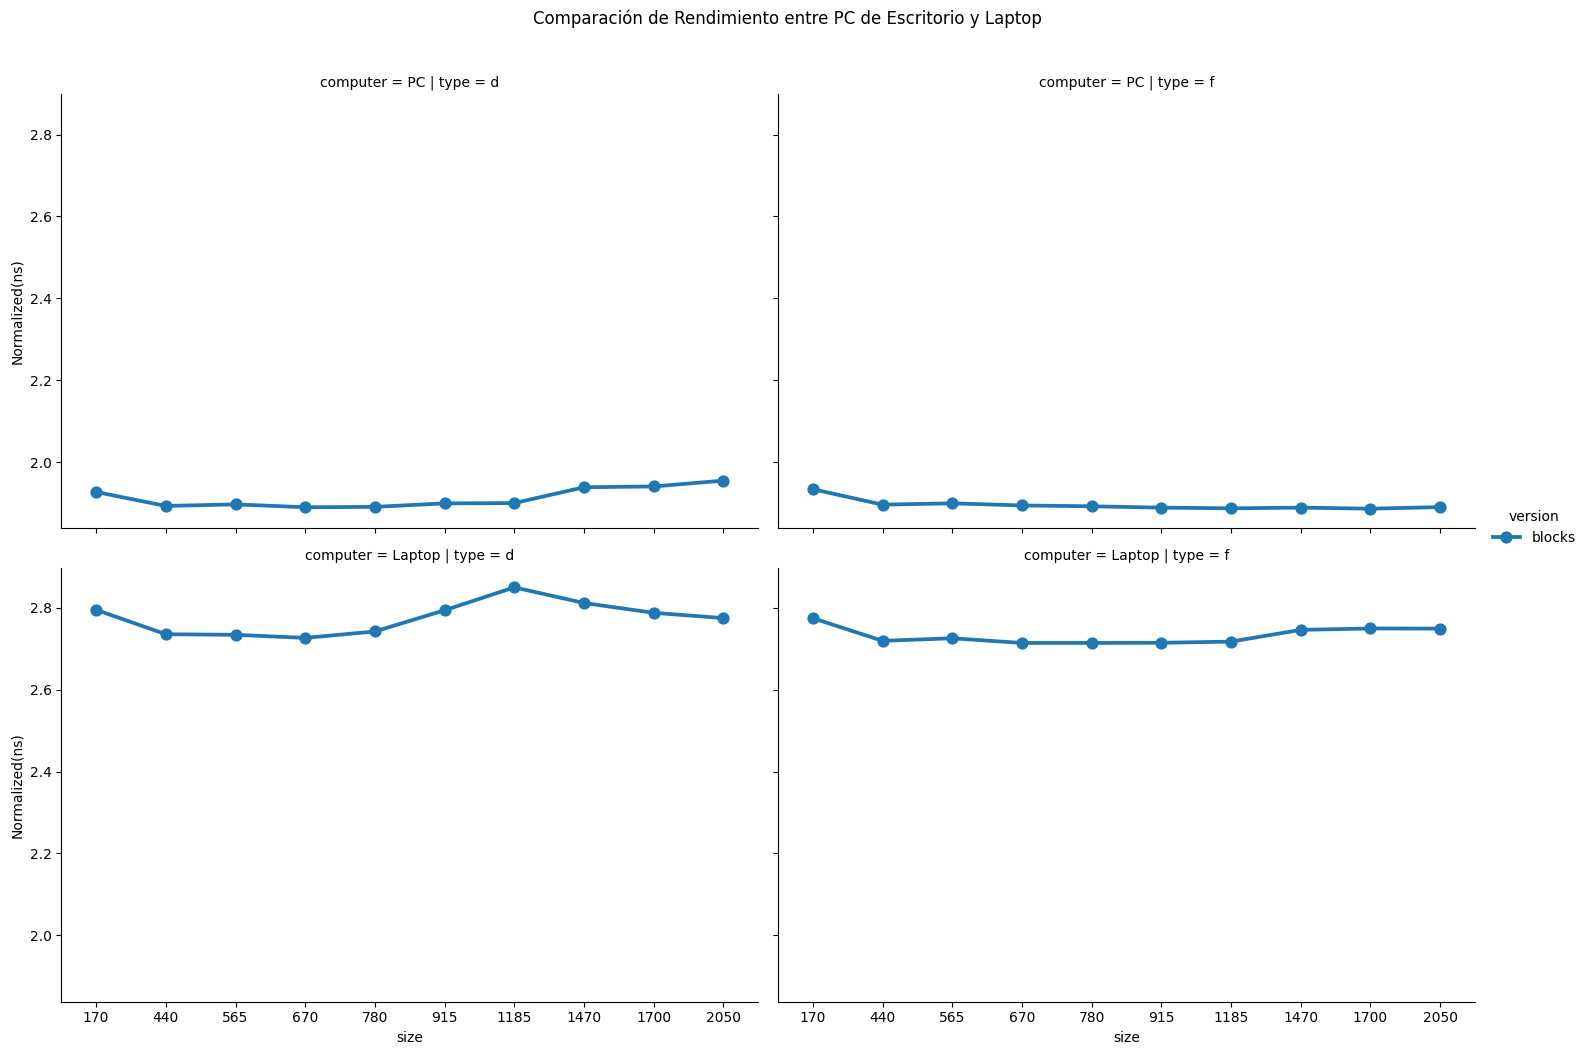

In [ ]:
# Comparación gráfica entre PC de Escritorio y Laptop para un análisis conjunto de rendimiento
df_pc['computer'] = 'PC'
df_laptop['computer'] = 'Laptop'
df_combined = pd.concat([df_pc, df_laptop])

# Gráfico comparativo de interacción entre los dos equipos
sns.catplot(
    x='size',
    y='Normalized(ns)',
    hue='version',
    col='type',        # Dividir por el factor de tipo de dato (float/double)
    row='computer',    # Comparar entre PC y Laptop
    kind='point',
    data=df_combined,
    errorbar=None,
    height=5,
    aspect=1.5
)

# Título del gráfico comparativo
plt.suptitle('Comparación de Rendimiento entre PC de Escritorio y Laptop', y=1.05)
plt.show()


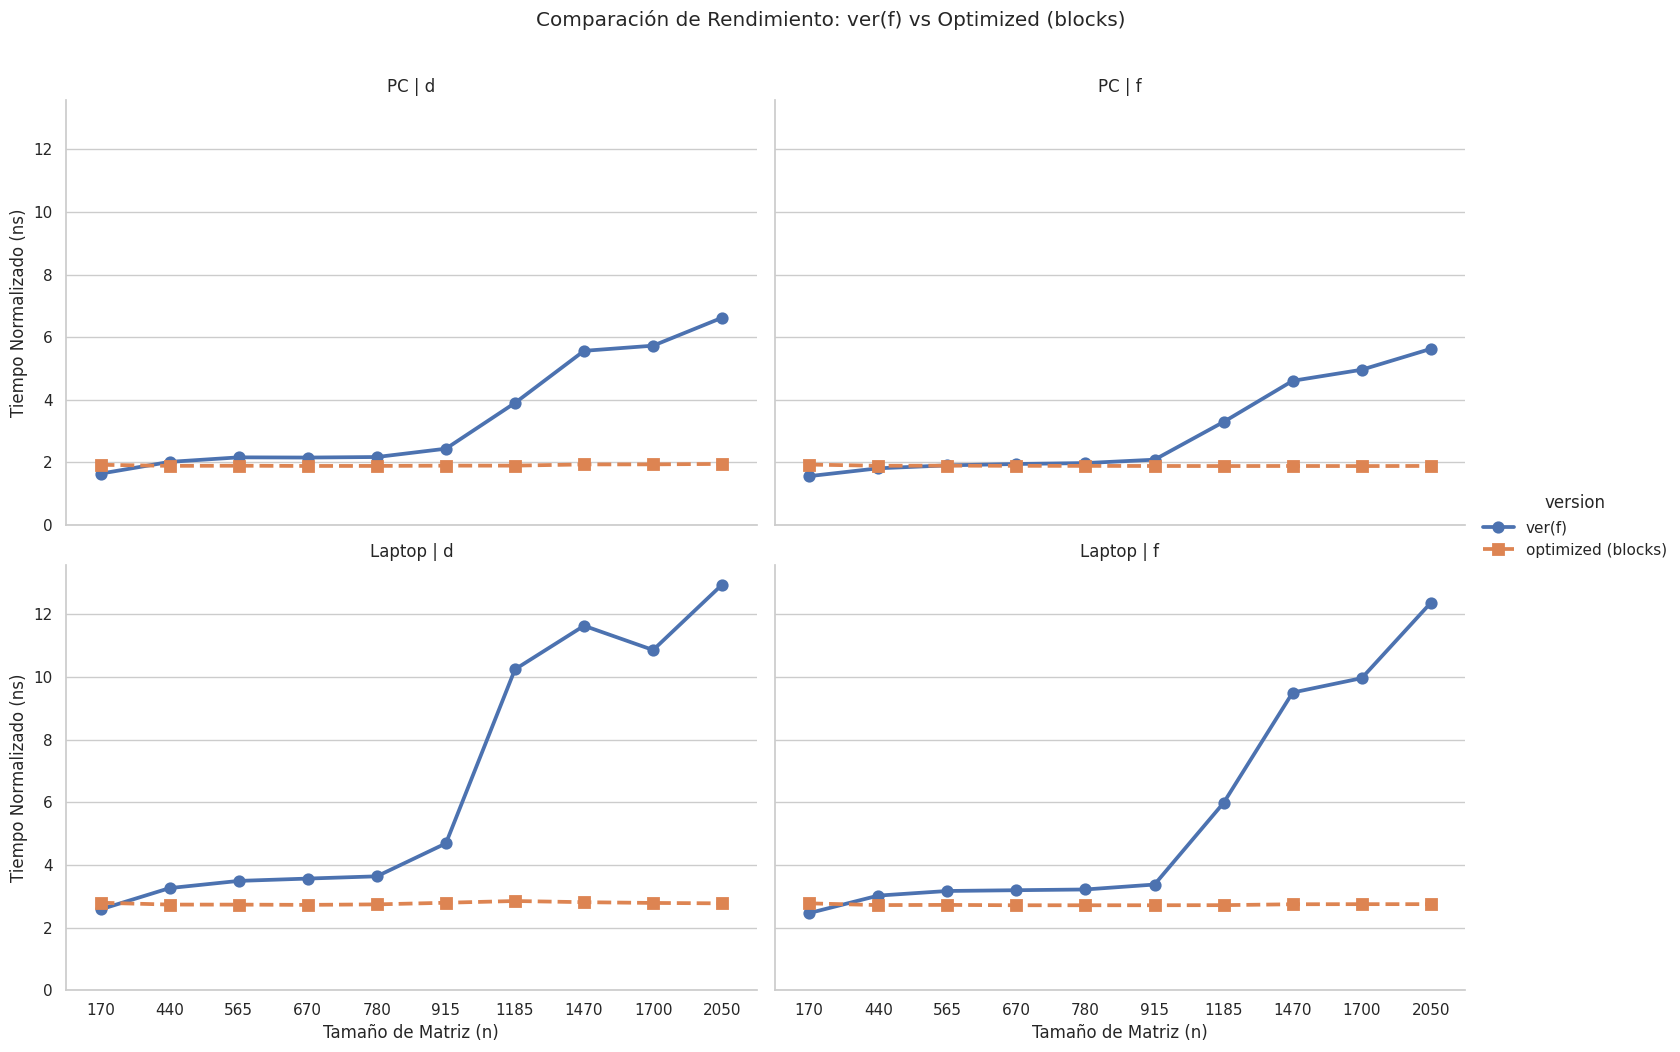

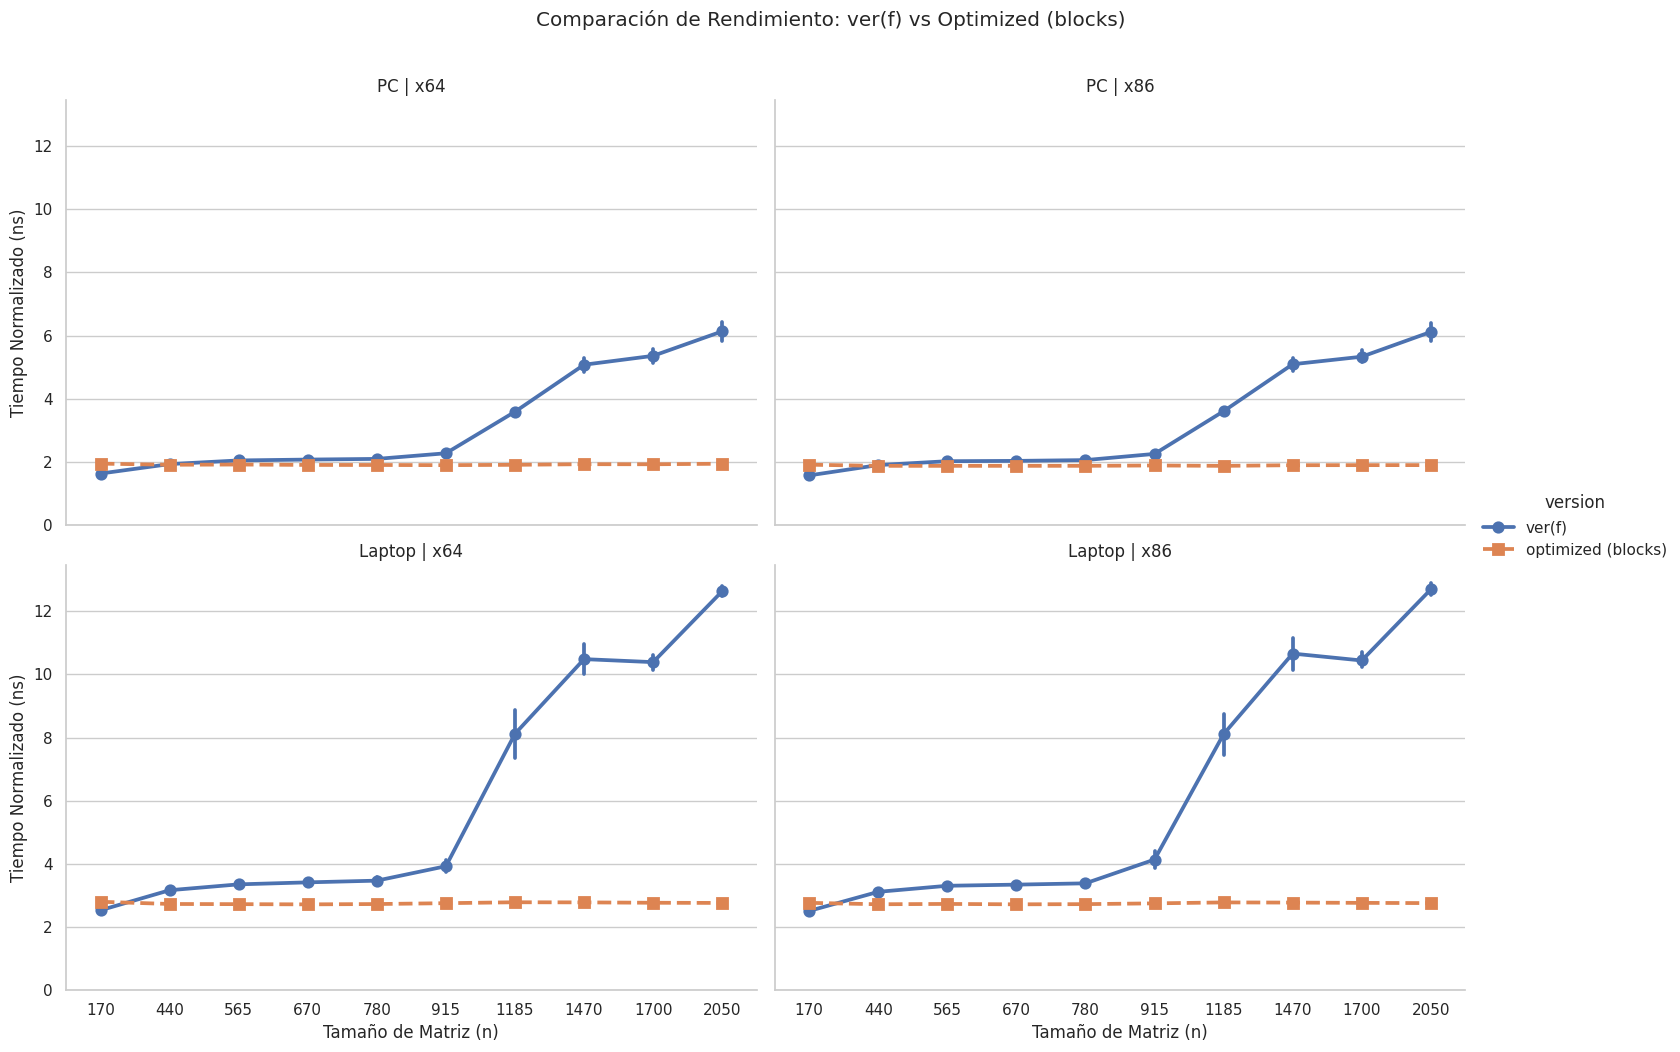

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar y preparar los conjuntos de datos desde las hojas
df_pc = pd.read_excel("Datos_Ajustados_Optimizado.xlsx", sheet_name="ReportePCIteracionesAjustadas")
df_laptop = pd.read_excel("Datos_Ajustados_Optimizado.xlsx", sheet_name="ReporteLaptopIteracionesAjustad")
df_optimized_pc = pd.read_excel("Datos_Ajustados_Optimizado.xlsx", sheet_name="ReportOptimizedPC")
df_optimized_laptop = pd.read_excel("Datos_Ajustados_Optimizado.xlsx", sheet_name="ReportOptimizedLaptop")

# Renombrar columnas para facilitar el acceso y transformar columnas en categorías
for df in [df_pc, df_laptop, df_optimized_pc, df_optimized_laptop]:
    df.rename(columns={"ver": "version", "typeData": "type", "ISA": "ISA_type"}, inplace=True)
    df['version'] = pd.Categorical(df['version'].str.strip())  # Eliminar espacios y convertir en categoría
    df['type'] = pd.Categorical(df['type'].str.strip())        # Convertir 'type' en categoría
    df['size'] = pd.Categorical(df['n'])                      # Convertir 'n' (tamaño de matriz) en categoría
    df['ISA_type'] = pd.Categorical(df['ISA_type'].str.strip())  # Convertir 'ISA_type' en categoría

# Filtrar las versiones relevantes y añadir etiquetas de dispositivo
df_pc_f = df_pc[df_pc['version'] == 'ver(f)'].copy()
df_laptop_f = df_laptop[df_laptop['version'] == 'ver(f)'].copy()
df_optimized_pc['version'] = 'optimized (blocks)'
df_optimized_laptop['version'] = 'optimized (blocks)'

df_pc_f['computer'] = 'PC'
df_optimized_pc['computer'] = 'PC'
df_laptop_f['computer'] = 'Laptop'
df_optimized_laptop['computer'] = 'Laptop'

# Combinar datos de la versión `f` y optimizada
df_combined_pc = pd.concat([df_pc_f, df_optimized_pc], ignore_index=True)
df_combined_laptop = pd.concat([df_laptop_f, df_optimized_laptop], ignore_index=True)
df_combined = pd.concat([df_combined_pc, df_combined_laptop], ignore_index=True)

# Gráfico comparativo de tiempo normalizado
sns.set(style="whitegrid")
g = sns.catplot(
    data=df_combined,
    x='size',  # Tamaño de la matriz
    y='Normalized(ns)',  # Tiempo normalizado
    hue='version',       # Comparar versiones
    col='type',          # Separar por tipo de dato (float/double)
    row='computer',      # Separar por dispositivo (PC/Laptop)
    kind='point',        # Gráfico de líneas con puntos
    height=5,            # Altura de los subgráficos
    aspect=1.5,          # Relación de aspecto de los subgráficos
    markers=["o", "s"],  # Diferentes marcadores
    linestyles=["-", "--"]
)

# Ajustes estéticos
g.set_axis_labels("Tamaño de Matriz (n)", "Tiempo Normalizado (ns)")
g.set_titles("{row_name} | {col_name}")
g.set(ylim=(0, None))  # Asegurarse de no cortar datos en el eje y
g.fig.suptitle("Comparación de Rendimiento: ver(f) vs Optimized (blocks)", y=1.05)

# Mostrar gráfico
plt.show()

# Gráfico comparativo de tiempo normalizado
sns.set(style="whitegrid")
g = sns.catplot(
    data=df_combined,
    x='size',  # Tamaño de la matriz
    y='Normalized(ns)',  # Tiempo normalizado
    hue='version',       # Comparar versiones
    col='ISA_type',          # Separar por tipo de dato (float/double)
    row='computer',      # Separar por dispositivo (PC/Laptop)
    kind='point',        # Gráfico de líneas con puntos
    height=5,            # Altura de los subgráficos
    aspect=1.5,          # Relación de aspecto de los subgráficos
    markers=["o", "s"],  # Diferentes marcadores
    linestyles=["-", "--"]
)

# Ajustes estéticos
g.set_axis_labels("Tamaño de Matriz (n)", "Tiempo Normalizado (ns)")
g.set_titles("{row_name} | {col_name}")
g.set(ylim=(0, None))  # Asegurarse de no cortar datos en el eje y
g.fig.suptitle("Comparación de Rendimiento: ver(f) vs Optimized (blocks)", y=1.05)

# Mostrar gráfico
plt.show()
